In [2]:
pip
install
torch

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/d6/a8/43e5033f9b2f727c158456e0720f870030ad3685c46f41ca3ca901b54922/torch-2.1.1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/192.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/192.3 MB 660.6 kB/s eta 0:04:52
   ---------------------------------------- 0.2/192.3 MB 2.1 MB/s eta 0:01:32
   ---------------------------------------- 0.7/192.3 MB 6.1 MB/s eta 0:00:32
   ---------------------------------------- 1.7/192.3 MB 11.0 MB/s eta 0:00:18
    --------------------------------------- 4.6/192.3 MB 22.4 MB/s eta 0:00:09
   - -------------------------------------- 5.4/192.3 MB 23.0 MB/s eta 0:00:09
   - -------------------------------------- 6.1/192.3 MB 21.7 MB/s eta 0:00:09
   - -------------------------------------- 7.0/192.3 MB 22.2 MB/s eta 0:00:09
   - -------------------------------------- 7.9/192.3 MB 21.9 MB/s eta 0:00:09
   - ----------

In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
import matplotlib

matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

# Train dataset

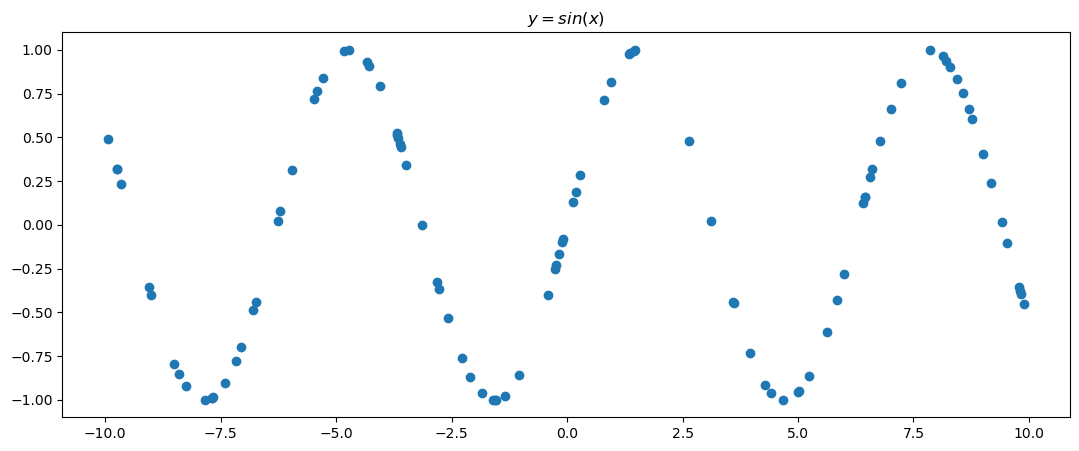

In [3]:
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0

y_train = torch.sin(x_train)

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = sin(x)$');

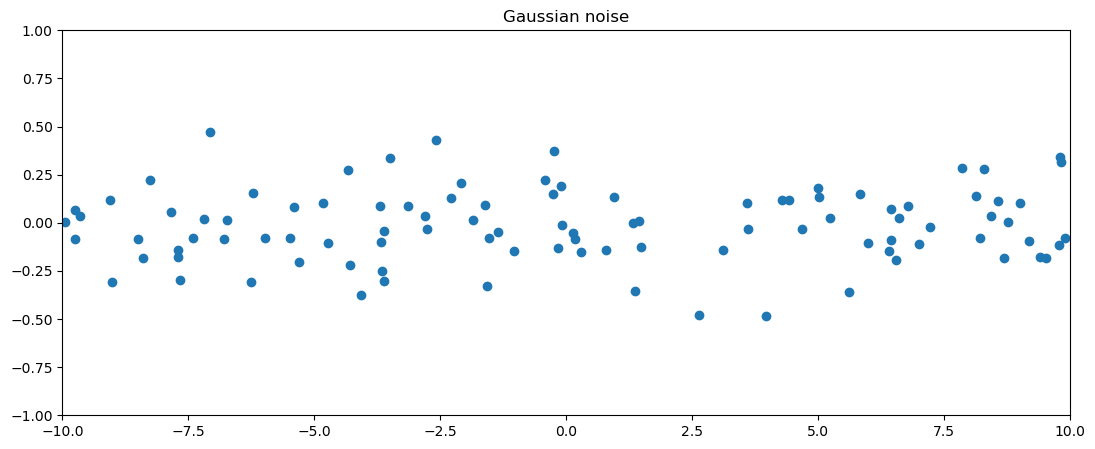

In [4]:
noise = torch.randn(y_train.shape) / 5.

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise');

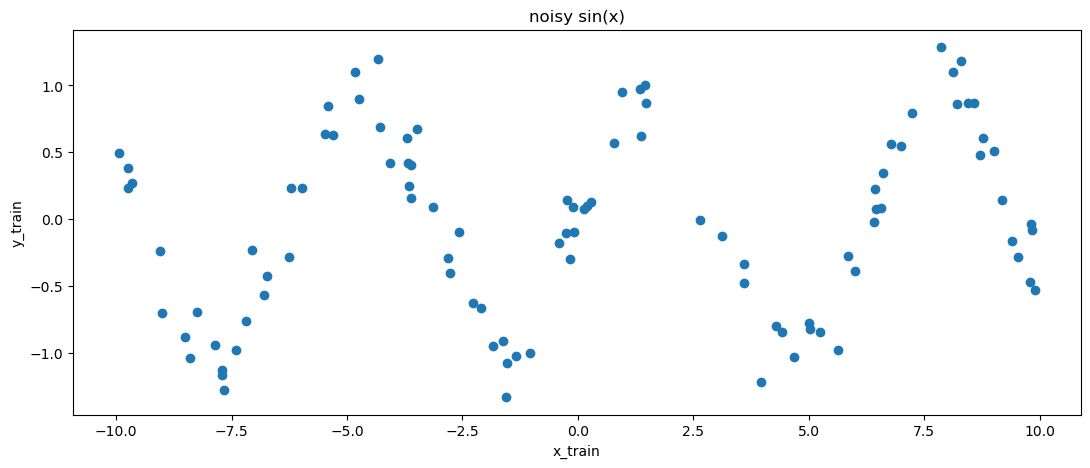

In [5]:
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

## unsqueeze - это reshape но в torch. И _ в каждых функциях работает как inplace=True

In [6]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

In [7]:
tmp = torch.Tensor([1, 2, 3])
print(tmp)
print(tmp.unsqueeze(1))

tensor([1., 2., 3.])
tensor([[1.],
        [2.],
        [3.]])


# Validation dataset

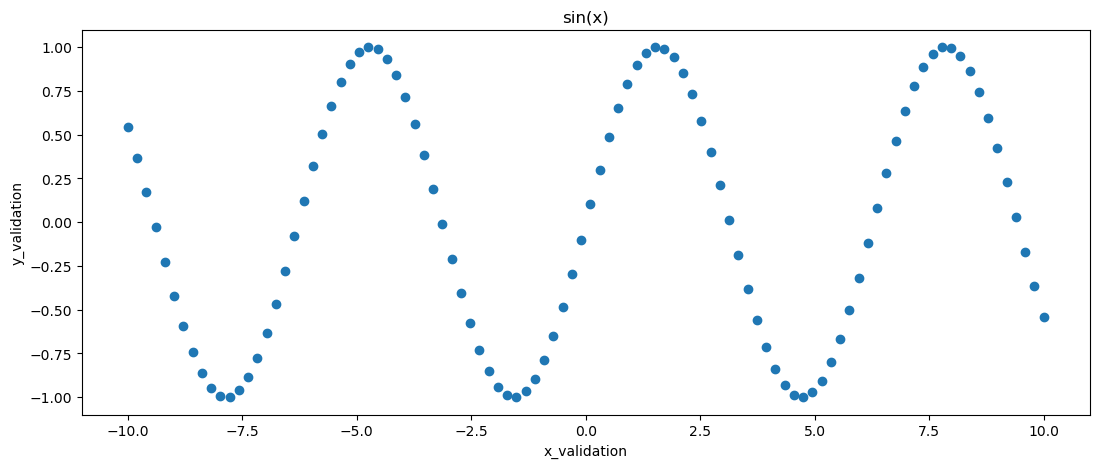

In [8]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

In [9]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

# Model construction

In [55]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons + 20)
        self.act2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(n_hidden_neurons + 20, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        return x


sine_net = SineNet(20)

# Prediction

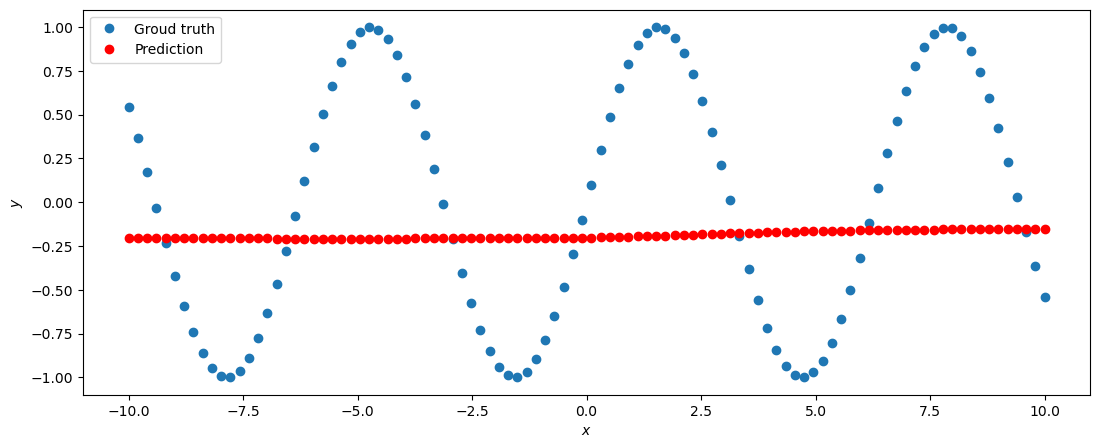

In [56]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')


predict(sine_net, x_validation, y_validation)

# Optimizer

In [57]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

# Loss function

In [58]:
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

# Training procedure

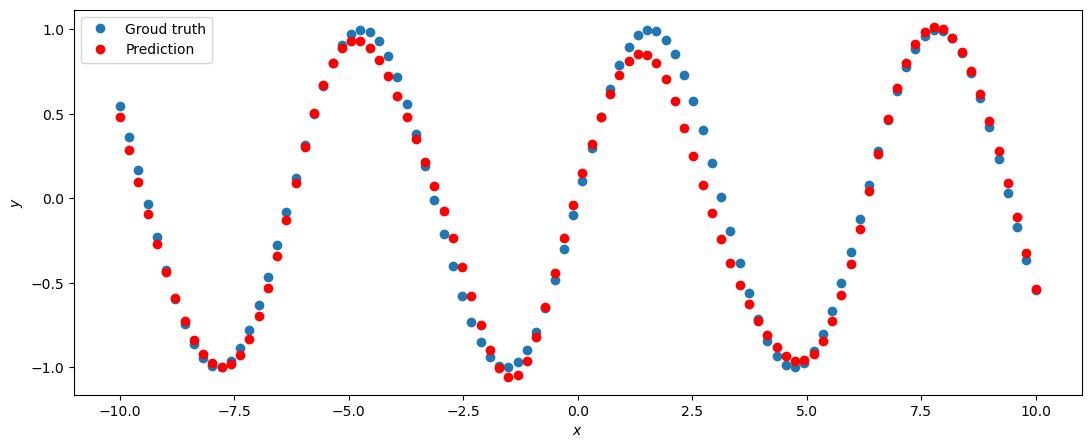

In [59]:
for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = sine_net.forward(x_train)
    loss_val = loss(y_pred, y_train)

    loss_val.backward()

    optimizer.step()

predict(sine_net, x_validation, y_validation)

In [81]:
import torch


def target_function(x):
    return 2 ** x * torch.sin(2 ** -x)


class RegressionNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(RegressionNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x


net = RegressionNet(10)

# ------Dataset preparation start--------:
x_train = torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset preparation end--------:


optimizer = torch.optim.Adam(net.parameters(), lr=0.01)


def loss(pred, target):
    absolute = (pred - target).abs()
    return absolute.mean()


for epoch_index in range(4000):
    optimizer.zero_grad()

    y_pred = net.forward(x_train)
    loss_value = loss(y_pred, y_train)
    loss_value.backward()
    optimizer.step()


def metric(pred, target):
    return (pred - target).abs().mean()


print(metric(net.forward(x_validation), y_validation).item())

0.021098818629980087


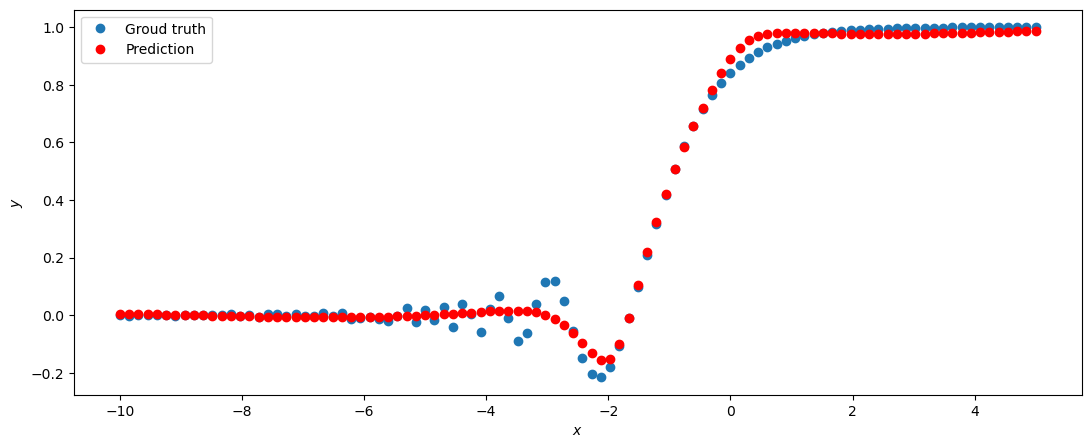

In [82]:
predict(net, x_validation, y_validation)

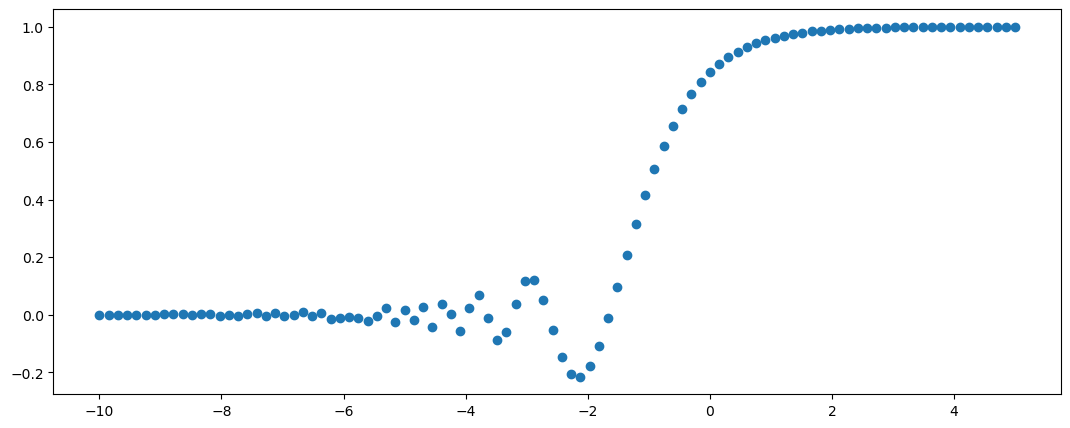

In [74]:
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')